### Лабораторная работа по модулю “Построение моделей”

1. Загрузить данные из папки Data Folder 

2. Провести описательный анализ предложенных данных 

3. Предложить стратегию по работе с категориальными переменными 

4. Провести углубленный анализ данных (корреляции переменных,визуализация взаимосвязей) 

5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты) 

6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты) 

7. Сделать кросс-валидациюданных с использованием подхода K-fold (n_folds=3) 

8. Решить задачу мультиклассовойклассификации и предсказать религию страны(religion)по деталям ее флага 

9. РассчитатьFeature Importancesдля переменных модели 

10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall 

11. Построить Confusion Matrix для ваших результатов 

12. Загрузить ipythonnotebook с результатами работы на githubрепозиторий
*Пункты,показавшиеся вам сложными,либо которые вы не знаете можно пропускать,но с пометкой в ноутбуке,что показалось сложным и непонятным в данном пункте для вас. 

##### 1. Загрузить данные из папки Data Folder 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('flag.data')
data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [4]:
# отсутствуют заголовки. Вместо них "встала" первая строка
df_cols = list(data.columns)
print(df_cols)

['Afghanistan', '5', '1', '648', '16', '10', '2', '0', '3', '5.1', '1.1', '1.2', '0.1', '1.3', '1.4', '1.5', '0.2', 'green', '0.3', '0.4', '0.5', '0.6', '1.6', '0.7', '0.8', '1.7', '0.9', '0.10', 'black', 'green.1']


In [5]:
# выведем первые 10
count = 0
with open('flag.data') as f:
    for row in f:
        if count <= 10:
            print(row)
            count += 1

        

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green

Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red

Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white

American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red

Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red

Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black

Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue

Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red

Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue

Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue

Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue



In [7]:
# прочитаем файл flag_names по строкам и запишем каждую строку в словарь
l = []
with open('flag_names.csv') as f:
    for row in f:
        print(row)
        l.append(row)

1. TItle: Flag database



2. Source Information

   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":

      Collins Publishers (1986).

   -- Donor: Richard S. Forsyth 

             8 Grosvenor Avenue

             Mapperley Park

             Nottingham NG3 5DX

             0602-621676

   -- Date: 5/15/1990



3. Past Usage:

   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.



4. Relevant Information:

   -- This data file contains details of various nations and their flags.

      In this file the fields are separated by spaces (not commas).  With

      this data you can try things like predicting the religion of a country

      from its size and the colours in its flag.  

   -- 10 attributes are numeric-valued.  The remainder are either Boolean-

      or nominal-valued.



5. Number of Instances: 194



6. Number of attributes: 30 (overall)



7. Attribute Information:

   1. name	Name of the country concerned

   2. landm

In [8]:
# создаем словарь: ключ - номер по порядку, значение - строка
dict_1 = {i:str(l[i]) for i in range(len(l))}
dict_1

{0: '1. TItle: Flag database\n',
 1: '\n',
 2: '2. Source Information\n',
 3: '   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":\n',
 4: '      Collins Publishers (1986).\n',
 5: '   -- Donor: Richard S. Forsyth \n',
 6: '             8 Grosvenor Avenue\n',
 7: '             Mapperley Park\n',
 8: '             Nottingham NG3 5DX\n',
 9: '             0602-621676\n',
 10: '   -- Date: 5/15/1990\n',
 11: '\n',
 12: '3. Past Usage:\n',
 13: "   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.\n",
 14: '\n',
 15: '4. Relevant Information:\n',
 16: '   -- This data file contains details of various nations and their flags.\n',
 17: '      In this file the fields are separated by spaces (not commas).  With\n',
 18: '      this data you can try things like predicting the religion of a country\n',
 19: '      from its size and the colours in its flag.  \n',
 20: '   -- 10 attributes are numeric-valued.  The remainder are either Boolean-\n',
 

In [9]:
# выберем строки, в которых находятся нужные нам названия колонок
for key, value in dict_1.items():
    if 'Attribute' in (value):
        start = key
    elif 'Missing' in (value):
        end = key
print(start)
print(end)

27
69


In [10]:
dict_1[start]

'7. Attribute Information:\n'

In [11]:
dict_1[end]

'8. Missing values: None'

In [17]:
# создадим файл, в который запишем интересующий нас фрагмент с названиями колонок
filename = 'cols.txt'
for key, value in dict_1.items():
    if end > key > start:
        print(value)
        with open(filename, 'a') as file_object:
            file_object.write(value.lstrip())# + '\n')

   1. name	Name of the country concerned

   2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania

   3. zone	Geographic quadrant, based on Greenwich and the Equator

                1=NE, 2=SE, 3=SW, 4=NW

   4. area	in thousands of square km

   5. population	in round millions

   6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other 

               Indo-European, 7=Chinese, 8=Arabic, 

               9=Japanese/Turkish/Finnish/Magyar, 10=Others

   7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,

               5=Ethnic, 6=Marxist, 7=Others

   8. bars     Number of vertical bars in the flag

   9. stripes  Number of horizontal stripes in the flag

  10. colours  Number of different colours in the flag

  11. red      0 if red absent, 1 if red present in the flag

  12. green    same for green

  13. blue     same for blue

  14. gold     same for gold (also yellow)

  15. white    same for white

  16. black    sam

In [18]:
digits = [str(x) for x in range(31)]
# создадим словарь для названий колонок
dict_2 = {}

In [20]:
# распарсим нужный фрагмент и запишем названия колонок в словарь
with open(filename) as f:
    for row in f:
        if row.split('.')[0] in digits:
            try:
                print(row.split('.')[0])
                print(row.split()[1])
                dict_2[int(row.split('.')[0])] = row.split()[1]
            except:
                pass

1
name
2
landmass
3
zone
4
area
5
population
6
language
7
religion
8
bars
9
stripes
10
colours
11
red
12
green
13
blue
14
gold
15
white
16
black
17
orange
18
mainhue
19
circles
20
crosses
21
saltires
22
quarters
23
sunstars
24
crescent
25
triangle
26
icon
27
animate
28
text
29
topleft
30
botright


In [21]:
# получили словарь
dict_2

{1: 'name',
 2: 'landmass',
 3: 'zone',
 4: 'area',
 5: 'population',
 6: 'language',
 7: 'religion',
 8: 'bars',
 9: 'stripes',
 10: 'colours',
 11: 'red',
 12: 'green',
 13: 'blue',
 14: 'gold',
 15: 'white',
 16: 'black',
 17: 'orange',
 18: 'mainhue',
 19: 'circles',
 20: 'crosses',
 21: 'saltires',
 22: 'quarters',
 23: 'sunstars',
 24: 'crescent',
 25: 'triangle',
 26: 'icon',
 27: 'animate',
 28: 'text',
 29: 'topleft',
 30: 'botright'}

In [23]:
sorted(dict_2.items())

[(1, 'name'),
 (2, 'landmass'),
 (3, 'zone'),
 (4, 'area'),
 (5, 'population'),
 (6, 'language'),
 (7, 'religion'),
 (8, 'bars'),
 (9, 'stripes'),
 (10, 'colours'),
 (11, 'red'),
 (12, 'green'),
 (13, 'blue'),
 (14, 'gold'),
 (15, 'white'),
 (16, 'black'),
 (17, 'orange'),
 (18, 'mainhue'),
 (19, 'circles'),
 (20, 'crosses'),
 (21, 'saltires'),
 (22, 'quarters'),
 (23, 'sunstars'),
 (24, 'crescent'),
 (25, 'triangle'),
 (26, 'icon'),
 (27, 'animate'),
 (28, 'text'),
 (29, 'topleft'),
 (30, 'botright')]

In [24]:
# запишем в список названия колонок
col_list = []
col_str = ''
for i in dict_2.keys():
    col_list.append(sorted(dict_2.items())[i-1][1])
    col_str += (sorted(dict_2.items())[i-1][1] + ', ')
col_str = col_str.strip()[0:-1]
print(col_str + '\n')
print(col_list)

name, landmass, zone, area, population, language, religion, bars, stripes, colours, red, green, blue, gold, white, black, orange, mainhue, circles, crosses, saltires, quarters, sunstars, crescent, triangle, icon, animate, text, topleft, botright

['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']


In [403]:
#with open('flag.data') as f:
#    for row in f:
#        print(row)

In [26]:
col_str

'name, landmass, zone, area, population, language, religion, bars, stripes, colours, red, green, blue, gold, white, black, orange, mainhue, circles, crosses, saltires, quarters, sunstars, crescent, triangle, icon, animate, text, topleft, botright'

In [27]:
# создадим новый файл и первой строкой запишем имена колонок
filename = 'new_flag_data.csv'
with open(filename, 'a') as file_object:
    file_object.write(col_str + '\n')

In [28]:
# в новый файл перепишем построчно данные из 'flag.data'
with open('flag.data') as f:
    for row in f:
        with open(filename, 'a') as file_object:
            file_object.write(row + '\n')

In [29]:
# получили требуемый результат: датафрейм с правильными названиями колонок и всеми строками, включая Афганистан
data_with_head = pd.read_csv('new_flag_data.csv')
data_with_head.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [404]:
# Проще было добавить строку и переименовать стролбцы так:

In [30]:
data = pd.read_csv('flag.data')
df_cols = list(data.columns)
data.loc[0, df_cols] = df_cols
data.columns = col_list
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


##### 2. Провести описательный анализ предложенных данных 


In [31]:
# пропущенных значений нет. Тип данных - object, странно. Разберемся с этим далее
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 30 columns):
name          193 non-null object
landmass      193 non-null object
zone          193 non-null object
area          193 non-null object
population    193 non-null object
language      193 non-null object
religion      193 non-null object
bars          193 non-null object
stripes       193 non-null object
colours       193 non-null object
red           193 non-null object
green         193 non-null object
blue          193 non-null object
gold          193 non-null object
white         193 non-null object
black         193 non-null object
orange        193 non-null object
mainhue       193 non-null object
circles       193 non-null object
crosses       193 non-null object
saltires      193 non-null object
quarters      193 non-null object
sunstars      193 non-null object
crescent      193 non-null object
triangle      193 non-null object
icon          193 non-null object
animate    

In [32]:
data.describe()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
count,193,193,193,193,193,193,193,193,193,193,...,193,193,193,193,193,193,193,193,193,193
unique,193,7,5,135,49,11,9,6,13,9,...,3,4,15,3,3,3,3,3,7,9
top,Morocco,4,1,0,0,10,1,0,0,3,...,0,0,0,0,0,0,0,0,red,red
freq,1,52,89,34,56,45,60,157,109,74,...,174,166,114,181,165,144,154,176,55,68


In [33]:
data.columns

Index(['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'topleft', 'botright'],
      dtype='object')

In [34]:
# посмотрим, какие уникальные значения есть для каждого поля
# в строке про Афганистан значения типа str. Будем это исправлять
for column in data.columns:
    print(column)
    print(data[column].unique())
    print()


name
['Afghanistan' 'Algeria' 'American-Samoa' 'Andorra' 'Angola' 'Anguilla'
 'Antigua-Barbuda' 'Argentina' 'Argentine' 'Australia' 'Austria' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Botswana' 'Brazil' 'British-Virgin-Isles' 'Brunei'
 'Bulgaria' 'Burkina' 'Burma' 'Burundi' 'Cameroon' 'Canada'
 'Cape-Verde-Islands' 'Cayman-Islands' 'Central-African-Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comorro-Islands' 'Congo' 'Cook-Islands'
 'Costa-Rica' 'Cuba' 'Cyprus' 'Czechoslovakia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican-Republic' 'Ecuador' 'Egypt' 'El-Salvador'
 'Equatorial-Guinea' 'Ethiopia' 'Faeroes' 'Falklands-Malvinas' 'Fiji'
 'Finland' 'France' 'French-Guiana' 'French-Polynesia' 'Gabon' 'Gambia'
 'Germany-DDR' 'Germany-FRG' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hong-Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Irela

In [35]:
# переводим строки в числовые значения там, где возможно
# последнее значение "битое" - 'green.1'. 
for i in range(len(df_cols)):
    try:
        df_cols[i] = round(float(df_cols[i]))
    except:
        pass
print(df_cols)

['Afghanistan', 5, 1, 648, 16, 10, 2, 0, 3, 5, 1, 1, 0, 1, 1, 2, 0, 'green', 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 'black', 'green.1']


In [36]:
# исправим 'green.1' на 'green'
df_cols[-1] = df_cols[-1].split('.')[0]
print(df_cols)

['Afghanistan', 5, 1, 648, 16, 10, 2, 0, 3, 5, 1, 1, 0, 1, 1, 2, 0, 'green', 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 'black', 'green']


In [37]:
# перезапишем первую строку
data.loc[0, :] = df_cols

In [38]:
# проверим еще раз уникальные значения. Теперь порядок
for column in data.columns:
    print(column)
    print(sorted(data[column].unique()))
    print()

name
['Afghanistan', 'Algeria', 'American-Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua-Barbuda', 'Argentina', 'Argentine', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'British-Virgin-Isles', 'Brunei', 'Bulgaria', 'Burkina', 'Burma', 'Burundi', 'Cameroon', 'Canada', 'Cape-Verde-Islands', 'Cayman-Islands', 'Central-African-Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comorro-Islands', 'Congo', 'Cook-Islands', 'Costa-Rica', 'Cuba', 'Cyprus', 'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican-Republic', 'Ecuador', 'Egypt', 'El-Salvador', 'Equatorial-Guinea', 'Ethiopia', 'Faeroes', 'Falklands-Malvinas', 'Fiji', 'Finland', 'France', 'French-Guiana', 'French-Polynesia', 'Gabon', 'Gambia', 'Germany-DDR', 'Germany-FRG', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong-Kon

In [41]:
# заменим закодированные значения на категориальные, чтобы после get_dummies можно было легче интерпретировать содержимое колонок
# да и модель может "подумать", что Africa в два раза больше S.America
# Вернем названия континентам (landmass): 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
landmass_list = []
for i in data['landmass']:
    if i == 1:
        i = 'N.America'
        landmass_list.append(i)
    elif i == 2:
        i = 'S.America'
        landmass_list.append(i)
    elif i == 3:
        i = 'Europe'
        landmass_list.append(i)
    elif i == 4:
        i = 'Africa'
        landmass_list.append(i)
    elif i == 5:
        i = 'Asia'
        landmass_list.append(i)
    elif i == 6:
        i = 'Oceania'
        landmass_list.append(i)

In [42]:
# Вернем названия полушариям (zone): 1=NE, 2=SE, 3=SW, 4=NW
zone_list = []
for i in data['zone']:
    if i == 1:
        i = 'NE'
        zone_list.append(i)
    elif i == 2:
        i = 'SE'
        zone_list.append(i)
    elif i == 3:
        i = 'SW'
        zone_list.append(i)
    elif i == 4:
        i = 'NW'
        zone_list.append(i)

In [43]:
# Вернем названия языкам (language):
# 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 
# 9=Japanese/Turkish/Finnish/Magyar, 10=Others
language_list = []
for i in data['language']:
    if i == 1:
        i = 'English'
        language_list.append(i)
    elif i == 2:
        i = 'Spanish'
        language_list.append(i)
    elif i == 3:
        i = 'French'
        language_list.append(i)
    elif i == 4:
        i = 'German'
        language_list.append(i)
    elif i == 5:
        i = 'Slavic'
        language_list.append(i)
    elif i == 6:
        i = 'Other_Indo_European'
        language_list.append(i)
    elif i == 7:
        i = 'Chinese'
        language_list.append(i)
    elif i == 8:
        i = 'Arabic'
        language_list.append(i)
    elif i == 9:
        i = 'Japanese/Turkish/Finnish/Magyar'
        language_list.append(i)
    elif i == 10:
        i = 'Others'
        language_list.append(i)

In [44]:
# заменим значения в датафрейме
data['landmass'] = landmass_list
data['zone'] = zone_list
data['language'] = language_list

In [45]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,NE,648,16,Others,2,0,3,5,...,0,1,2,1,1,2,1,0,black,green
1,Algeria,Africa,NE,2388,20,Arabic,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,Oceania,SW,0,0,English,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,Europe,NE,0,0,Other_Indo_European,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,Africa,SE,1247,7,Others,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [46]:
# очередной раз проверим значения в колонках
for column in data.columns:
    print(column)
    print(sorted(data[column].unique()))
    print()

name
['Afghanistan', 'Algeria', 'American-Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua-Barbuda', 'Argentina', 'Argentine', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'British-Virgin-Isles', 'Brunei', 'Bulgaria', 'Burkina', 'Burma', 'Burundi', 'Cameroon', 'Canada', 'Cape-Verde-Islands', 'Cayman-Islands', 'Central-African-Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comorro-Islands', 'Congo', 'Cook-Islands', 'Costa-Rica', 'Cuba', 'Cyprus', 'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican-Republic', 'Ecuador', 'Egypt', 'El-Salvador', 'Equatorial-Guinea', 'Ethiopia', 'Faeroes', 'Falklands-Malvinas', 'Fiji', 'Finland', 'France', 'French-Guiana', 'French-Polynesia', 'Gabon', 'Gambia', 'Germany-DDR', 'Germany-FRG', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong-Kon

In [47]:
# почему black принимает 3 значения? 0,1,2
data['black'].value_counts()

0    142
1     50
2      1
Name: black, dtype: int64

In [48]:
# потому что в первой строчке, которая была вначале использована в качестве заголовка, 16-е значение округлилось до 2.
#['Afghanistan', '5', '1', '648', '16', '10', '2', '0', '3', '5.1', '1.1', '1.2', '0.1', '1.3', '1.4',
# '1.5', - вот это
# '0.2', 'green', '0.3', '0.4', '0.5', '0.6', '1.6', '0.7', '0.8', '1.7', '0.9', '0.10', 'black', 'green.1']
# округлим его до 1
data['black'][data['black'] == 2] = 1
data['black'].head()

0    1
1    0
2    0
3    0
4    1
Name: black, dtype: object

In [49]:
# интересно, как распределена целевая переменная
# 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,5=Ethnic, 6=Marxist, 7=Others
# неравномерно. Дальше попробуем порабоатать над этим
data['religion'].value_counts(normalize=True)

1    0.310881
0    0.207254
2    0.186528
5    0.139896
6    0.072539
3    0.041451
7    0.020725
4    0.020725
Name: religion, dtype: float64

In [50]:
# визуализируем представленность классов религии
religions = {0:'Catholic', 1:'Other Christian', 2:'Muslim', 3:'Buddhist', 4:'Hindu', 5:'Ethnic', 6:'Marxist', 7:'Others'}
rel_count = data.groupby(by='religion').size().reset_index(name='counts')
rel_count.religion = rel_count.religion.map(religions)

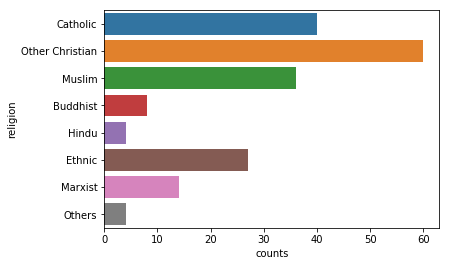

In [51]:
sns.barplot(x='counts', y='religion', data=rel_count)

##### 3. Предложить стратегию по работе с категориальными переменными 

In [52]:
dict_3 = {'number': list(range(1, len(data.columns)+1)),
          'column':list(data.columns), 
         'decision': ['Кат. переменная. Удалим', 
                     'Кат. переменная. Сделаем get_dummies', 
                     'Кат. переменная. Сделаем get_dummies', 
                     'Численная переменная.Не меняем', 
                     'Численная переменная.Не меняем', 
                     'Кат. переменная. Сделаем get_dummies', 
                     'Целевая переменная. Не меняем. Это "y"', 
                     'Численная переменная.Не меняем', 
                     'Численная переменная.Не меняем', 
                     'Численная переменная.Не меняем', 
                     'Кат. переменная. Закодирована 0 и 1. Не меняем', 
                     'Кат. переменная. Закодирована 0 и 1. Не меняем', 
                     'Кат. переменная. Закодирована 0 и 1. Не меняем', 
                     'Кат. переменная. Закодирована 0 и 1. Не меняем', 
                     'Кат. переменная. Закодирована 0 и 1. Не меняем', 
                     'Кат. переменная. Закодирована 0 и 1. Не меняем', 
                     'Кат. переменная. Закодирована 0 и 1. Не меняем', 
                     'Кат. переменная. Сделаем get_dummies', 
                     'Численная переменная.Не меняем',
                     'Численная переменная.Не меняем',
                     'Численная переменная.Не меняем',
                     'Численная переменная.Не меняем',
                     'Численная переменная.Не меняем',
                     'Кат. переменная. Закодирована 0 и 1. Не меняем',
                     'Кат. переменная. Закодирована 0 и 1. Не меняем',
                     'Кат. переменная. Закодирована 0 и 1. Не меняем',
                     'Кат. переменная. Закодирована 0 и 1. Не меняем',
                     'Кат. переменная. Закодирована 0 и 1. Не меняем',
                      'Кат. переменная. Сделаем get_dummies',
                      'Кат. переменная. Сделаем get_dummies' 
                     ]}

In [53]:
decision_about_columns = pd.DataFrame(dict_3)
decision_about_columns

,number,column,decision
0,1,name,Кат. переменная. Удалим
1,2,landmass,Кат. переменная. Сделаем get_dummies
2,3,zone,Кат. переменная. Сделаем get_dummies
3,4,area,Численная переменная.Не меняем
4,5,population,Численная переменная.Не меняем
5,6,language,Кат. переменная. Сделаем get_dummies
6,7,religion,"Целевая переменная. Не меняем. Это ""y"""
7,8,bars,Численная переменная.Не меняем
8,9,stripes,Численная переменная.Не меняем
9,10,colours,Численная переменная.Не меняем


In [54]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,Asia,NE,648,16,Others,2,0,3,5,...,0,1,2,1,1,2,1,0,black,green
1,Algeria,Africa,NE,2388,20,Arabic,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,Oceania,SW,0,0,English,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,Europe,NE,0,0,Other_Indo_European,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,Africa,SE,1247,7,Others,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [55]:
# применим get_dummies
columns_to_get_dumm = [ 'landmass', 'zone', 'language', 'mainhue', 'topleft', 'botright' ]
data_encoded = pd.get_dummies( data, prefix=None, prefix_sep='_', columns=columns_to_get_dumm)
# удалим столбец name
del data_encoded['name']
data_encoded.head()

,area,population,religion,bars,stripes,colours,red,green,blue,gold,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,648,16,2,0,3,5,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2388,20,2,2,0,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,5,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,3,0,3,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,1247,7,5,0,2,3,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [56]:
# было 30 колонок, добавилось еще 36
data_encoded.columns

Index(['area', 'population', 'religion', 'bars', 'stripes', 'colours', 'red',
       'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles',
       'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle',
       'icon', 'animate', 'text', 'landmass_Africa', 'landmass_Asia',
       'landmass_Europe', 'landmass_N.America', 'landmass_Oceania',
       'landmass_S.America', 'zone_NE', 'zone_NW', 'zone_SE', 'zone_SW',
       'language_Arabic', 'language_Chinese', 'language_English',
       'language_French', 'language_German',
       'language_Japanese/Turkish/Finnish/Magyar',
       'language_Other_Indo_European', 'language_Others', 'language_Slavic',
       'language_Spanish', 'mainhue_black', 'mainhue_blue', 'mainhue_brown',
       'mainhue_gold', 'mainhue_green', 'mainhue_orange', 'mainhue_red',
       'mainhue_white', 'topleft_black', 'topleft_blue', 'topleft_gold',
       'topleft_green', 'topleft_orange', 'topleft_red', 'topleft_white',
       'botright_black', '

In [57]:
# проверим типы данных в колонках. Помним, что почему-то object там, где должны быть числа.
for i in list(data_encoded.columns):
    print(i)
    print (data_encoded[i].dtype.name)
    print('-----------')

area
object
-----------
population
object
-----------
religion
object
-----------
bars
object
-----------
stripes
object
-----------
colours
object
-----------
red
object
-----------
green
object
-----------
blue
object
-----------
gold
object
-----------
white
object
-----------
black
object
-----------
orange
object
-----------
circles
object
-----------
crosses
object
-----------
saltires
object
-----------
quarters
object
-----------
sunstars
object
-----------
crescent
object
-----------
triangle
object
-----------
icon
object
-----------
animate
object
-----------
text
object
-----------
landmass_Africa
uint8
-----------
landmass_Asia
uint8
-----------
landmass_Europe
uint8
-----------
landmass_N.America
uint8
-----------
landmass_Oceania
uint8
-----------
landmass_S.America
uint8
-----------
zone_NE
uint8
-----------
zone_NW
uint8
-----------
zone_SE
uint8
-----------
zone_SW
uint8
-----------
language_Arabic
uint8
-----------
language_Chinese
uint8
-----------
language_English


In [58]:
# найдем столбцы с категориальными признаками
сategorical_columns = [c for c in data_encoded.columns if data_encoded[c].dtype.name == 'object']
сategorical_columns

['area',
 'population',
 'religion',
 'bars',
 'stripes',
 'colours',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'circles',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text']

In [59]:
# переведем в числовой тип дпнные в этих столбцах
for сategorical_column in сategorical_columns:
    data_encoded[сategorical_column] = pd.to_numeric(data_encoded[сategorical_column])

In [60]:
# тип 'object' больше не встречается
[c for c in data_encoded.columns if data_encoded[c].dtype.name == 'object']

[]

In [61]:
# проверим еще раз типы данных в колонках
for i in list(data_encoded.columns):
    print(i)
    print (data_encoded[i].dtype.name)
    print('-----------')

area
int64
-----------
population
int64
-----------
religion
int64
-----------
bars
int64
-----------
stripes
int64
-----------
colours
int64
-----------
red
int64
-----------
green
int64
-----------
blue
int64
-----------
gold
int64
-----------
white
int64
-----------
black
int64
-----------
orange
int64
-----------
circles
int64
-----------
crosses
int64
-----------
saltires
int64
-----------
quarters
int64
-----------
sunstars
int64
-----------
crescent
int64
-----------
triangle
int64
-----------
icon
int64
-----------
animate
int64
-----------
text
int64
-----------
landmass_Africa
uint8
-----------
landmass_Asia
uint8
-----------
landmass_Europe
uint8
-----------
landmass_N.America
uint8
-----------
landmass_Oceania
uint8
-----------
landmass_S.America
uint8
-----------
zone_NE
uint8
-----------
zone_NW
uint8
-----------
zone_SE
uint8
-----------
zone_SW
uint8
-----------
language_Arabic
uint8
-----------
language_Chinese
uint8
-----------
language_English
uint8
-----------
langu

##### 4. Провести углубленный анализ данных (корреляции переменных,визуализация взаимосвязей) 


In [62]:
corr = data_encoded.corr()

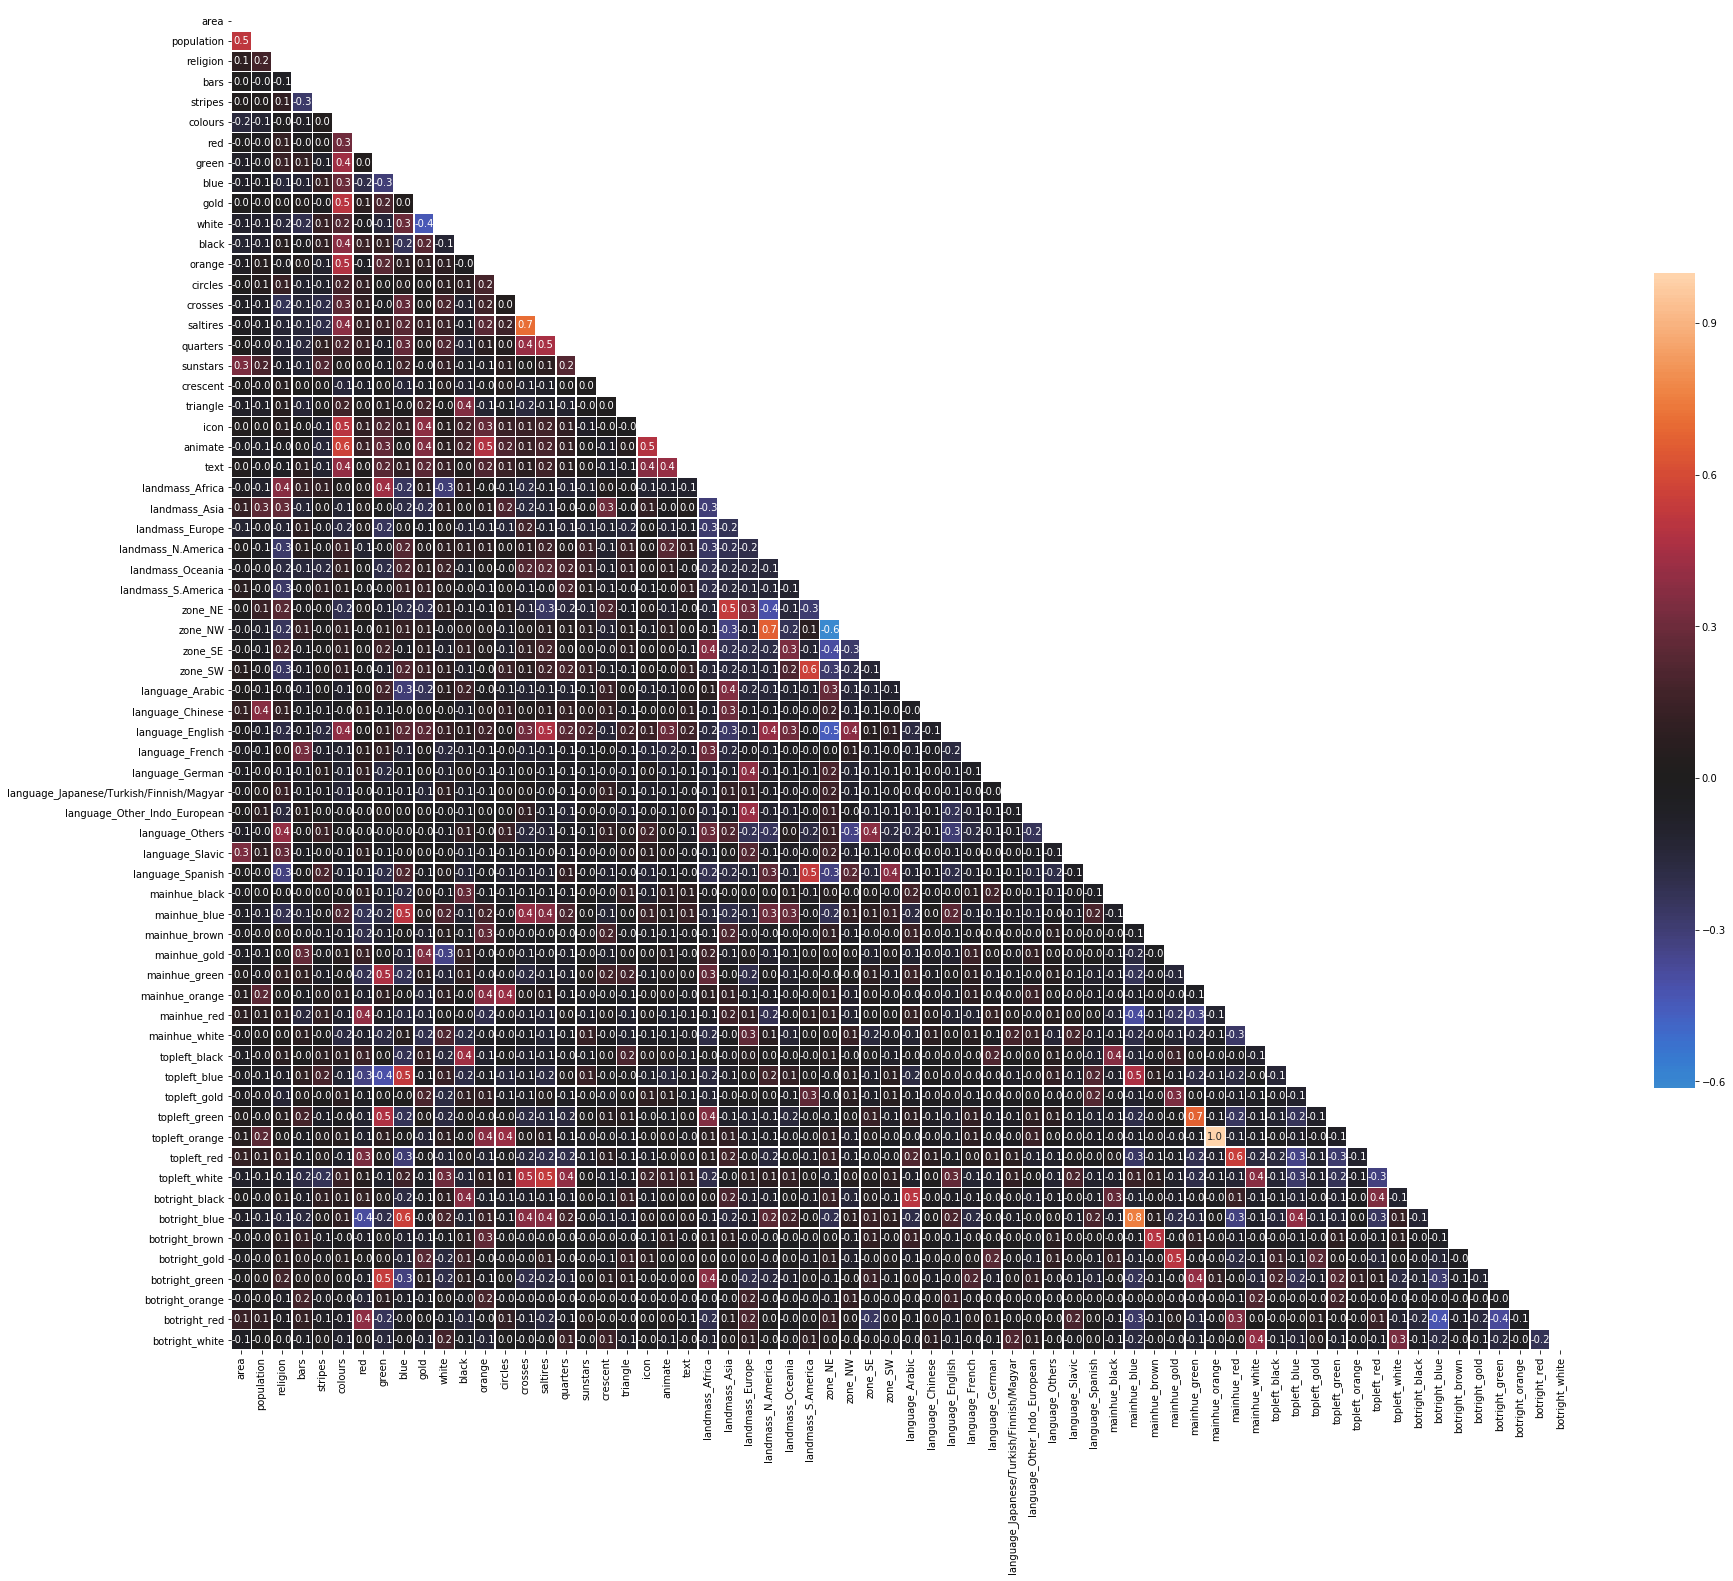

In [63]:
# видны зависимости между полушариями и континентами
# между языками и континентами
# цветом в верхнем  левом углу флага и преобладающим цветом флага
plt.figure(figsize=(30,30))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [64]:
# посмотрим топ-10 корреляций с религией. Религия сильнее всего коррелирует с прочими и испанским языками, 
# некоторыми континентами и полушариями
corr.abs().sort_values(by='religion', ascending=False).religion.head(10)

religion              1.000000
language_Others       0.405616
landmass_Africa       0.372231
language_Spanish      0.322480
landmass_Asia         0.280030
landmass_N.America    0.278392
language_Slavic       0.272691
landmass_S.America    0.267653
zone_SW               0.264338
zone_NW               0.242961
Name: religion, dtype: float64

In [65]:
corr_columns = list(corr.abs().sort_values(by='religion', ascending=False).religion.head(7).index)

In [66]:
data_pair_plot = data_encoded[corr_columns]


C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


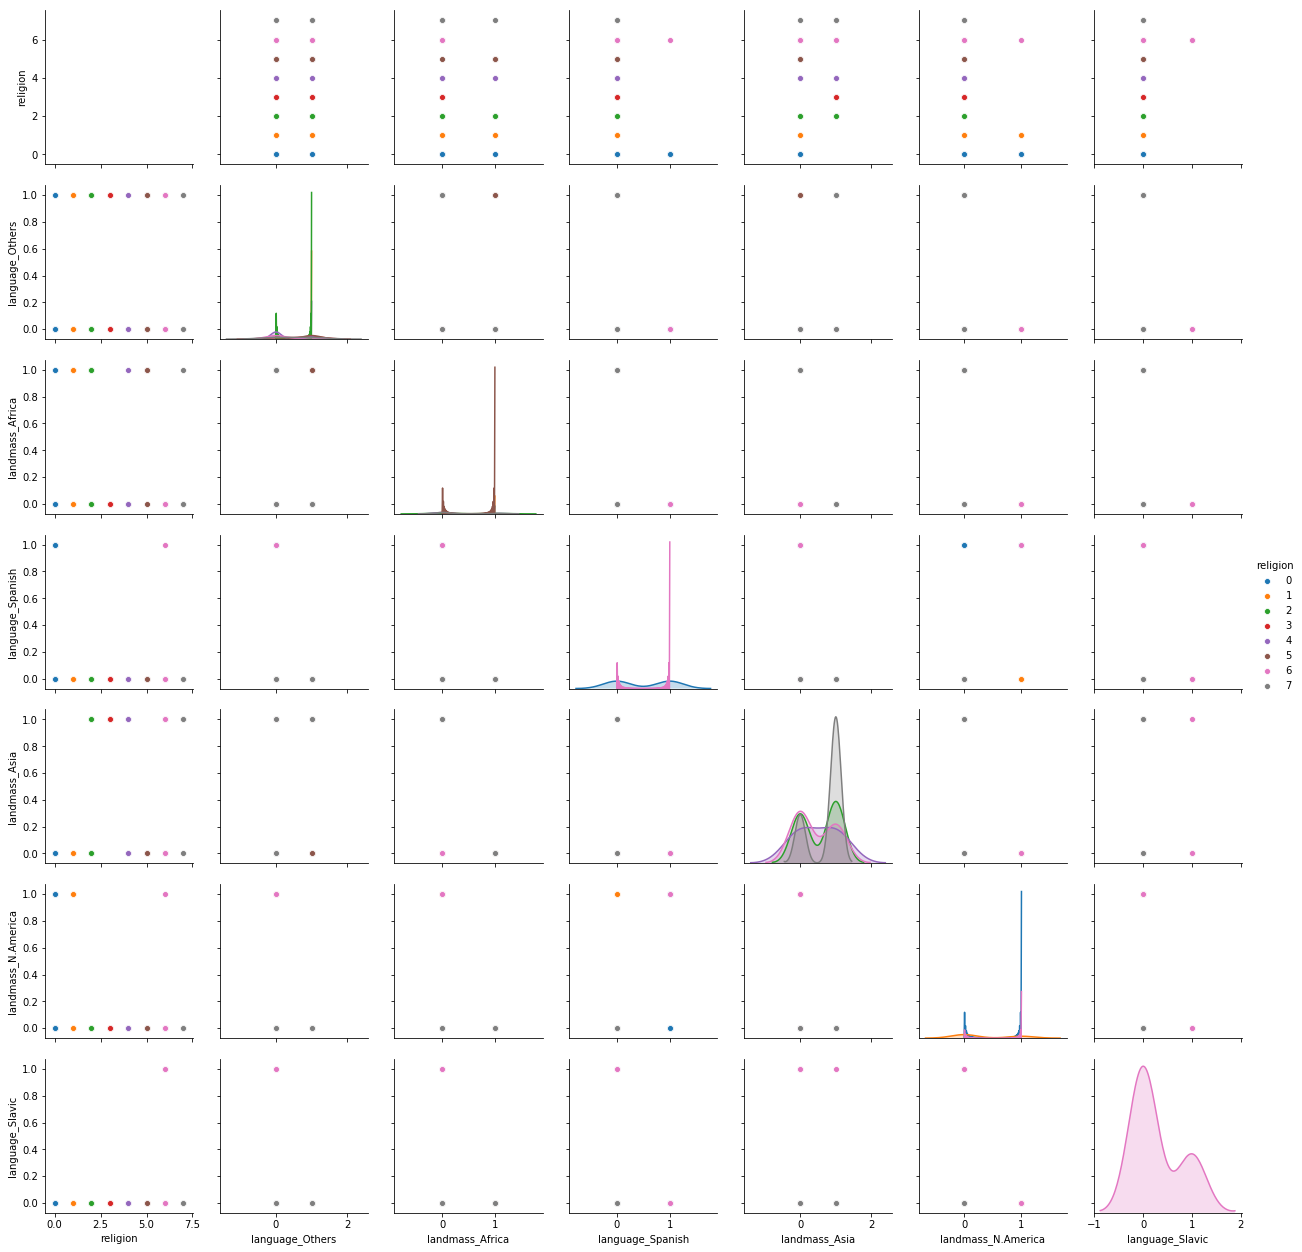

In [67]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data_pair_plot, hue='religion');

In [68]:
corr_columns

['religion',
 'language_Others',
 'landmass_Africa',
 'language_Spanish',
 'landmass_Asia',
 'landmass_N.America',
 'language_Slavic']

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


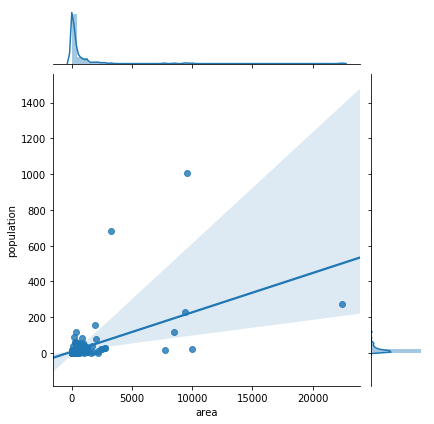

In [70]:
# попытка увидеть зависимость между населением и территорией
sns.jointplot(x='area', y='population', 
              data=data_encoded, kind='reg');

##### 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты) 

In [71]:
# для начала нормируем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [89]:
# классы религий нормализовывать не будем
columns_for_norm = np.delete(data_encoded.columns, 2)
columns_for_norm

Index(['area', 'population', 'bars', 'stripes', 'colours', 'red', 'green',
       'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'landmass_Africa', 'landmass_Asia',
       'landmass_Europe', 'landmass_N.America', 'landmass_Oceania',
       'landmass_S.America', 'zone_NE', 'zone_NW', 'zone_SE', 'zone_SW',
       'language_Arabic', 'language_Chinese', 'language_English',
       'language_French', 'language_German',
       'language_Japanese/Turkish/Finnish/Magyar',
       'language_Other_Indo_European', 'language_Others', 'language_Slavic',
       'language_Spanish', 'mainhue_black', 'mainhue_blue', 'mainhue_brown',
       'mainhue_gold', 'mainhue_green', 'mainhue_orange', 'mainhue_red',
       'mainhue_white', 'topleft_black', 'topleft_blue', 'topleft_gold',
       'topleft_green', 'topleft_orange', 'topleft_red', 'topleft_white',
       'botright_black', 'botright_blu

In [90]:
data_encoded_normed=pd.DataFrame(scaler.fit_transform(data_encoded[columns_for_norm]), columns=columns_for_norm)
data_encoded_normed.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,area,population,bars,stripes,colours,red,green,blue,gold,white,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,-0.025582,-0.080210,-0.439341,0.61945,1.180004,0.519362,1.058716,-1.026251,1.069787,0.567378,...,-0.631309,-0.519362,-0.221163,-0.567378,-0.102329,-0.221163,1.955761,-0.072169,-0.737564,-0.310791
1,0.776118,-0.036695,1.487770,-0.67070,-0.358785,0.519362,1.058716,-1.026251,-0.934765,0.567378,...,-0.631309,-0.519362,-0.221163,-0.567378,-0.102329,-0.221163,-0.511310,-0.072169,-0.737564,3.217599
2,-0.324146,-0.254269,-0.439341,-0.67070,1.180004,0.519362,-0.944541,0.974420,1.069787,0.567378,...,-0.631309,-0.519362,-0.221163,-0.567378,-0.102329,-0.221163,-0.511310,-0.072169,1.355815,-0.310791
3,-0.324146,-0.254269,2.451326,-0.67070,-0.358785,0.519362,-0.944541,0.974420,1.069787,-1.762493,...,-0.631309,-0.519362,-0.221163,-0.567378,-0.102329,-0.221163,-0.511310,-0.072169,1.355815,-0.310791
4,0.250405,-0.178118,-0.439341,0.18940,-0.358785,0.519362,-0.944541,-1.026251,1.069787,-1.762493,...,1.584011,-0.519362,4.521553,-0.567378,-0.102329,-0.221163,-0.511310,-0.072169,-0.737564,-0.310791


In [91]:
# Используем Метод главных компонент (PCA) для оценки полезности фич
import matplotlib.pyplot as plt

Text(0,0.5,'explained_variance_ratio_')

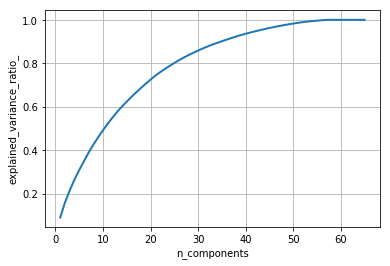

In [92]:
# большая часть фичей кажется полезной для объяснения дисперсии
from sklearn.decomposition import PCA

pca = PCA().fit(data_encoded_normed)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Text(0,0.5,'explained_variance_ratio_')

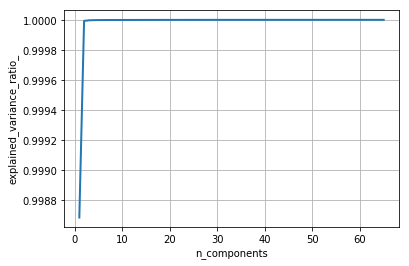

In [93]:
# без нормализации 2-3 фичи объясняют 100% дисперсии
pca_unnormed = PCA().fit(data_encoded[columns_for_norm])

cum_evr = np.cumsum(pca_unnormed.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

##### 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты) 

In [159]:
# посмотрим на мало представленные религии
# 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,5=Ethnic, 6=Marxist, 7=Others
data['religion'].value_counts(normalize=True).tail()

5    0.139896
6    0.072539
3    0.041451
7    0.020725
4    0.020725
Name: religion, dtype: float64

In [162]:
! pip install imblearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [163]:
from imblearn.over_sampling import RandomOverSampler

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
# разобъем данные на X и y
X = data_encoded.drop('religion', axis = 1)
y = data_encoded['religion']

In [171]:
# разобъем данные на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [172]:
sampler = RandomOverSampler(random_state=42)

In [173]:
# выдумываем новые флаги
X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)

In [178]:
# добавилось много строчек
print(X_train.shape)
print(y_train.shape)
print(X_train_sampled.shape)
print(y_train_sampled.shape)

(154, 65)
(154,)
(384, 65)
(384,)


In [183]:
X_train_sampled = pd.DataFrame(X_train_sampled, columns = X.columns)
X_train_sampled.head()

,area,population,bars,stripes,colours,red,green,blue,gold,white,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0,0,0,0,6,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,22,0,0,0,4,1,1,1,0,1,...,0,1,0,0,0,0,1,0,0,0
2,1973,77,3,0,4,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,324,4,0,0,3,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,3,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [196]:
y_train_sampled = pd.Series(y_train_sampled)
y_train_sampled.head()

0    1
1    2
2    0
3    1
4    1
dtype: int64

In [197]:
# теперь доли у всех религий одинаковые. Интересно, как бы это повлияло на общество?
y_train_sampled.value_counts(normalize=True)

7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
0    0.125
dtype: float64

In [198]:
# всех религий по 48
y_train_sampled.value_counts()

7    48
6    48
5    48
4    48
3    48
2    48
1    48
0    48
dtype: int64

In [405]:
# ниже посмотрим, улучшились ли результаты на oversempled-данных

##### 7. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3) 


In [199]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold # вместо cross_val_score, который устарел
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

In [200]:
# в качестве классификатора берем случайный лес
clf = RandomForestClassifier()

In [201]:
# задаем параметры KFold
kf = KFold(n_splits=3, shuffle=True, random_state=None)

In [202]:
# у нас 3 фолда
kf.get_n_splits(X)

3

In [209]:
# разбиваем данные на 3 части и выводим индексы
for k in enumerate(kf.split(X)):
    print(k)

(0, (array([  0,   2,   3,   5,   6,   7,   9,  10,  12,  13,  16,  17,  18,
        19,  20,  22,  23,  24,  25,  26,  30,  31,  35,  36,  37,  38,
        40,  41,  44,  45,  46,  47,  48,  51,  52,  53,  54,  55,  58,
        59,  61,  62,  65,  66,  68,  70,  71,  72,  73,  74,  76,  79,
        80,  82,  85,  87,  88,  89,  91,  93,  95,  97,  98,  99, 100,
       101, 102, 103, 105, 106, 107, 108, 110, 111, 113, 114, 116, 117,
       118, 122, 123, 125, 126, 130, 132, 133, 134, 136, 137, 138, 139,
       140, 141, 142, 144, 145, 146, 147, 149, 150, 151, 152, 156, 157,
       158, 159, 160, 161, 164, 165, 166, 169, 170, 171, 173, 174, 176,
       177, 178, 180, 181, 182, 183, 186, 188, 189, 190, 192]), array([  1,   4,   8,  11,  14,  15,  21,  27,  28,  29,  32,  33,  34,
        39,  42,  43,  49,  50,  56,  57,  60,  63,  64,  67,  69,  75,
        77,  78,  81,  83,  84,  86,  90,  92,  94,  96, 104, 109, 112,
       115, 119, 120, 121, 124, 127, 128, 129, 131, 135, 143, 148, 

In [210]:
# выведем первый фолд
X[X.index.isin(list(enumerate(kf.split(X, y)))[0][1][0].tolist())].head()

,area,population,bars,stripes,colours,red,green,blue,gold,white,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,648,16,0,3,5,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,2388,20,2,0,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,5,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,3,0,3,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1247,7,0,2,3,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [211]:
# соберем индексы каждого из трех фолдов в список списков
indexes_for_kfold = []
for i in range(0,3):
    indexes_for_kfold.append(list(enumerate(kf.split(X)))[i][1][0].tolist())
print(indexes_for_kfold)

[[0, 2, 4, 6, 8, 9, 12, 13, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 41, 42, 43, 45, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 68, 69, 70, 71, 73, 74, 75, 77, 78, 80, 82, 84, 87, 89, 91, 92, 94, 95, 96, 97, 99, 100, 103, 106, 107, 108, 109, 110, 112, 114, 115, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 132, 133, 135, 136, 137, 138, 139, 141, 143, 144, 145, 146, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 168, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 187, 188, 190, 191], [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 34, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 59, 60, 62, 63, 65, 66, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 86, 87, 89, 90, 91, 92, 93, 95, 97, 100, 102, 103, 104, 105, 108, 109, 110, 112, 114, 115, 119, 120, 121, 122, 123, 124, 125, 128, 130, 132, 133, 134, 135, 136, 138, 141, 143, 144,

In [212]:
def custom_kfold_accuracy(X, y, kfold_with_params, classifier):
    """Функция делит данные на фолды, сохраняет индексы строк каждого фолда в список, обучает классификатор,
    запоминает его результат accuracy в словарь и выводит результат по каждому фолду и среднее значение accuracy_score
    """
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold
    
    indexes_for_kfold = []

    for i in range(0, kf.get_n_splits(X)):
        indexes_for_kfold.append(list(enumerate(kfold_with_params.split(X)))[i][1][0].tolist())
    
    accuracy_dict = {}
    
    fold_number = 1

    for indexes in indexes_for_kfold:
        X_train = X[X.index.isin(indexes)]
        y_train = y[y.index.isin(indexes)]
        X_test = X[X.index.isin(list(set(X.index) - set(indexes)))]
        y_test = y[y.index.isin(list(set(y.index) - set(indexes)))]
        
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        accuracy = clf.score(X_test, y_test)
        
        accuracy_dict[fold_number] = accuracy
        fold_number += 1
    
    #return accuracy_dict
    for key in accuracy_dict.keys():
        print('Фолд номер {0} дал точность {1:.3f}'.format(key, accuracy_dict[key]))
    print('--------------------')
    print('Средняя точность: {0:.3f}'.format( np.mean(list(accuracy_dict.values() )  ) ) )


In [213]:
custom_kfold_accuracy(X, y, kf, clf)

Фолд номер 1 дал точность 0.692
Фолд номер 2 дал точность 0.641
Фолд номер 3 дал точность 0.625
--------------------
Средняя точность: 0.653


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [214]:
# проверим точность для классификатора DecisionTreeClassifier

In [215]:
clf2 = DecisionTreeClassifier()

In [216]:
custom_kfold_accuracy(X, y, kf, clf2)

Фолд номер 1 дал точность 0.631
Фолд номер 2 дал точность 0.656
Фолд номер 3 дал точность 0.578
--------------------
Средняя точность: 0.622


In [218]:
# случайный лес показал лучший результат
# теперь посмотрим для этих двух классификаторов, улучшится ли точность на oversampling-данных

In [219]:
custom_kfold_accuracy(X_train_sampled, y_train_sampled, kf, clf)

Фолд номер 1 дал точность 0.922
Фолд номер 2 дал точность 0.953
Фолд номер 3 дал точность 0.891
--------------------
Средняя точность: 0.922


In [221]:
custom_kfold_accuracy(X_train_sampled, y_train_sampled, kf, clf2)

Фолд номер 1 дал точность 0.953
Фолд номер 2 дал точность 0.898
Фолд номер 3 дал точность 0.945
--------------------
Средняя точность: 0.932


In [222]:
# на этот раз результат лучше у DecisionTreeClassifier

##### 8. Решить задачу мультиклассовойклассификации и предсказать религию страны(religion)по деталям ее флага 


In [285]:
# грузим GridSearchCV и подбираем лучшие параметры для RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [286]:
# попробуем оценить эфективность при разных глубинах деревьев 
depths = np.arange(2,10)
features_num = np.arange(X.shape[1] // 2, X.shape[1])
#min_samples_leaves = np.arange(1,5)
grid = {'max_depth': depths, 'max_features': features_num}
gridsearch = GridSearchCV(clf, grid, scoring='accuracy', cv=3)


In [287]:
%%time
gridsearch.fit(X_train, y_train) # фитим

Wall time: 12.1 s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=36, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [288]:
# метрики, которые можно вытащить из cv_results_
gridsearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [289]:
# создадим dataframe с оценкой и комбинацией параметров
results_df = pd.DataFrame(sorted(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']), key = lambda x: -x[0]))
results_df.head()

,0,1
0,0.707792,"{'max_depth': 5, 'max_features': 33}"
1,0.694805,"{'max_depth': 4, 'max_features': 35}"
2,0.694805,"{'max_depth': 7, 'max_features': 56}"
3,0.694805,"{'max_depth': 8, 'max_features': 32}"
4,0.688312,"{'max_depth': 4, 'max_features': 44}"


In [365]:
clf = RandomForestClassifier(max_depth=5, max_features=33)

In [366]:
# обучаем модель на не-oversampled-данных
clf.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [367]:
# делаем предсказания
prediction = clf.predict(X_test)
prediction

array([6, 6, 0, 1, 0, 0, 2, 0, 1, 1, 5, 5, 2, 0, 1, 0, 1, 1, 5, 6, 3, 1,
       1, 0, 2, 0, 0, 3, 5, 0, 1, 0, 2, 5, 2, 0, 1, 2, 0], dtype=int64)

In [368]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.5897435897435898

In [294]:
# теперь обучим эту модель на oversampled-данных

In [295]:
%%time
gridsearch.fit(X_train_sampled, y_train_sampled)

Wall time: 13.2 s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=36, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [296]:
results_df = pd.DataFrame(sorted(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']), key = lambda x: -x[0]))
results_df.head(5)

,0,1
0,0.947917,"{'max_depth': 9, 'max_features': 63}"
1,0.942708,"{'max_depth': 9, 'max_features': 50}"
2,0.940104,"{'max_depth': 9, 'max_features': 42}"
3,0.937500,"{'max_depth': 9, 'max_features': 37}"
4,0.937500,"{'max_depth': 9, 'max_features': 53}"


In [317]:
clf = RandomForestClassifier(max_depth=9, max_features=63)

In [318]:
clf.fit(X_train_sampled, y_train_sampled)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=63, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [319]:
# делаем предсказания
prediction = clf.predict(X_test)
prediction

array([3, 3, 0, 1, 0, 0, 7, 6, 1, 1, 5, 5, 2, 0, 1, 0, 1, 1, 5, 3, 2, 0,
       5, 3, 2, 0, 6, 2, 5, 0, 1, 0, 2, 5, 2, 0, 1, 3, 0], dtype=int64)

In [320]:
# результат модели  на oversampled-данных оказался хуже. Применеие oversampling в данном случае оказалось сомнительным
accuracy_score(y_test, prediction)

0.717948717948718

In [ ]:
# теперь все то же самое для DecisionTreeClassifier

In [341]:
clf2 = DecisionTreeClassifier()

In [342]:
depths = np.arange(2,10)
features_num = np.arange(X.shape[1] // 2, X.shape[1])
grid = {'max_depth': depths, 'max_features': features_num}#, 'min_samples_leaf': min_samples_leaves}
gridsearch = GridSearchCV(clf2, grid, scoring='accuracy', cv=3)

In [343]:
%%time
gridsearch.fit(X_train, y_train) # фитим

Wall time: 3.21 s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [344]:
results_df2 = pd.DataFrame(sorted(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']), key = lambda x: -x[0]))
results_df2.head()

,0,1
0,0.649351,"{'max_depth': 7, 'max_features': 43}"
1,0.642857,"{'max_depth': 9, 'max_features': 37}"
2,0.629870,"{'max_depth': 6, 'max_features': 40}"
3,0.616883,"{'max_depth': 5, 'max_features': 42}"
4,0.616883,"{'max_depth': 6, 'max_features': 32}"


In [345]:
clf2 = DecisionTreeClassifier(max_depth=7, max_features=43)

In [346]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=43, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [347]:
prediction = clf2.predict(X_test)
prediction

array([6, 6, 0, 1, 1, 0, 6, 1, 1, 1, 5, 5, 2, 0, 1, 0, 1, 1, 5, 3, 6, 0,
       1, 7, 2, 1, 6, 6, 0, 0, 1, 1, 2, 2, 2, 2, 1, 3, 6], dtype=int64)

In [348]:
accuracy_score(y_test, prediction)

0.6923076923076923

In [349]:
# теперь обучимся на oversampled-данных

In [350]:
%%time
gridsearch.fit(X_train_sampled, y_train_sampled)

Wall time: 3.53 s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [351]:
results_df2 = pd.DataFrame(sorted(zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']), key = lambda x: -x[0]))
results_df2.head(5)

,0,1
0,0.911458,"{'max_depth': 9, 'max_features': 47}"
1,0.906250,"{'max_depth': 9, 'max_features': 48}"
2,0.906250,"{'max_depth': 9, 'max_features': 49}"
3,0.906250,"{'max_depth': 9, 'max_features': 59}"
4,0.903646,"{'max_depth': 9, 'max_features': 33}"


In [360]:
clf2 = DecisionTreeClassifier(max_depth=9, max_features=39)

In [361]:
clf2.fit(X_train_sampled, y_train_sampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=39, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [362]:
prediction = clf2.predict(X_test)
prediction

array([3, 3, 0, 0, 0, 0, 7, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 5, 4, 2, 0,
       2, 2, 2, 1, 0, 6, 5, 0, 1, 0, 2, 2, 5, 0, 1, 2, 6], dtype=int64)

In [363]:
accuracy_score(y_test, prediction)

0.5897435897435898

In [369]:
# лучшая точность получилась на oversampled данных у модели RandomForestClassifier(max_depth=9, max_features=63)
pd.DataFrame( [(0.589, 0.692), (0.717, 0.589)], ['Non-oversampled', 'oversampled'], columns = ['RandomForest', 'DecisionTree'])

,RandomForest,DecisionTree
Non-oversampled,0.589,0.692
oversampled,0.717,0.589


##### 9. Рассчитать Feature Importances для переменных модели 


In [94]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_ * 100 # процент дисперсии, которую объясняет каждая фича

array([9.01893894, 6.88182541, 5.5560616 , 5.01628187, 4.40641756,
       4.08186706, 4.03217314, 3.65625903, 3.36585075, 3.17969052,
       3.02936619, 2.7990533 , 2.68653944, 2.41021559, 2.24950688,
       2.2226749 , 2.05642503, 2.04634094, 1.92440958, 1.87846858,
       1.78690248, 1.60299167, 1.46386073, 1.43333971, 1.36510149,
       1.32323528, 1.18569217, 1.13800661, 1.03480892, 1.02650146,
       0.97250592, 0.91539463, 0.85586385, 0.78830735, 0.77147933,
       0.73599569, 0.72628099, 0.70124807, 0.65166186, 0.62004505,
       0.58247304, 0.53434273, 0.53002228, 0.51581547, 0.48255004,
       0.4515592 , 0.44218202, 0.40176513, 0.37913763, 0.35900103,
       0.34945016, 0.3177618 , 0.25899276, 0.22284849, 0.19964102,
       0.18189699, 0.17453392, 0.01843675, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [127]:
# для обучения можно брать фичи с влиянием на дисперсию от 1% и выше
# их 30
len(list(filter(lambda x: x>=1, (pca.explained_variance_ratio_ * 100))))

30

In [97]:
np.sum(pca.explained_variance_ratio_ * 100) # в сумме 100%

100.0

In [96]:
sorted(pca.components_[0], reverse=True)

[0.2908739169156006,
 0.2801306673792344,
 0.26777005061689635,
 0.2632984525090157,
 0.24401055249278172,
 0.24332946954273107,
 0.19672760412385043,
 0.1950927637420512,
 0.19204575995585194,
 0.18975138323560736,
 0.14170465772420662,
 0.1410397737045318,
 0.1345697365561137,
 0.1335994692163479,
 0.12231986110837434,
 0.12198990079900486,
 0.12073321099144442,
 0.10548976251566176,
 0.1033325426964121,
 0.09315640845522002,
 0.0746908197480321,
 0.06843991646293147,
 0.06630087316858611,
 0.033903263471087575,
 0.02560289164355934,
 0.016856774287740503,
 0.008265987769598256,
 0.0015983497482980151,
 -0.00012256794420502484,
 -0.0072087770579012484,
 -0.00821573743051224,
 -0.00886533440305825,
 -0.008865334403058256,
 -0.013390722192991738,
 -0.02196129706524661,
 -0.027052813573431537,
 -0.028167884010551984,
 -0.030720670424219887,
 -0.03110083557337782,
 -0.040034867342183186,
 -0.04008795807011717,
 -0.04021746794732472,
 -0.050108969401713874,
 -0.051228541731623285,
 -0.051

In [153]:
np.argmax(pca.components_[0]) # номер компоненты, с влиянием 0.29

43

In [141]:
# это фича mainhue_black

data_encoded_normed.columns[42]

'mainhue_black'

In [158]:
# посмотрим остальные топ-5 фичей по влиянию
for i in range(5):
    num = np.argmax(pca.components_[i])
    print('Номер компоненты: ', str(num))
    print(data_encoded_normed.columns[num-1])
    print('Влияние: ', sorted(pca.components_[0], reverse=True)[i])
    print()

Номер компоненты:  43
mainhue_black
Влияние:  0.2908739169156006

Номер компоненты:  6
red
Влияние:  0.2801306673792344

Номер компоненты:  23
landmass_Africa
Влияние:  0.26777005061689635

Номер компоненты:  47
mainhue_green
Влияние:  0.2632984525090157

Номер компоненты:  49
mainhue_red
Влияние:  0.24401055249278172



##### 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall 


In [375]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

In [377]:
clf = RandomForestClassifier(max_depth=9, max_features=63)

In [379]:
clf.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=63, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [382]:
# делаем предсказания
prediction = clf.predict(X_test)
prediction

array([3, 2, 0, 1, 0, 0, 7, 0, 1, 1, 5, 5, 2, 0, 1, 0, 1, 1, 5, 3, 2, 0,
       1, 6, 2, 0, 0, 2, 5, 0, 1, 0, 2, 5, 2, 0, 1, 3, 6], dtype=int64)

In [383]:
# при тех же параметрах модели результат разный, как следствие - другая точность
accuracy_score(y_test, prediction)

0.6666666666666666

In [392]:
import warnings
warnings.filterwarnings("ignore")

In [394]:
print('accuracy score: ', accuracy_score(y_test, clf.predict(X_test)))
print('f1 score: ', f1_score(y_test, clf.predict(X_test), average='weighted'))
print('precision score: ', precision_score(y_test, clf.predict(X_test), average='weighted'))
print('recall score: ', recall_score(y_test, clf.predict(X_test), average='weighted'))

accuracy score:  0.6666666666666666
f1 score:  0.654945054945055
precision score:  0.670940170940171
recall score:  0.6666666666666666


##### 11. Построить Confusion Matrix для ваших результатов 


In [395]:
from sklearn.metrics import confusion_matrix

In [401]:
confus_matrix = confusion_matrix(y_test, prediction)
confus_matrix

array([[8, 0, 0, 0, 0, 0, 0, 0],
       [3, 8, 0, 0, 0, 1, 0, 0],
       [0, 0, 4, 2, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 3, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

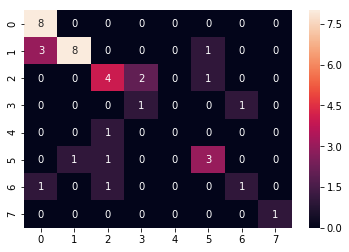

In [402]:
sns.heatmap(confus_matrix,annot=True)


religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others

##### 12. Загрузить ipythonnotebook с результатами работы на githubрепозиторий
